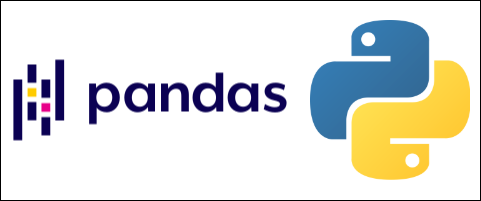

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
* When working with array data (e.g. images, numerical algorithms): just stick with numpy
 

**Need of Pandas**

* Import data
* Clean up messy data
* Explore data, gain insight into data
* Process and prepare your data for analysis
* Analyse your data (together with scikit-learn, statsmodels, ...)



In [ ]:
import pandas as pd
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
#url_pusa = "https://raw.githubusercontent.com/sarwansingh/Python/master/ClassExamples/data/president_heights.csv"
df_titanic = pd.read_csv(url, sep=",")
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
df_titanic.info()
df_titanic.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [ ]:
df_titanic.head(8)
df_titanic.tail(8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.500
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.050
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.450
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.000
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.750


In [ ]:
#reading and writing dataframe to excel 
#titanic.to_excel('titanic.xlsx', sheet_name='passengers', index=False)
#titanic = pd.read_excel('titanic.xlsx', sheet_name='passengers')

### select specific columns from a DataFrame

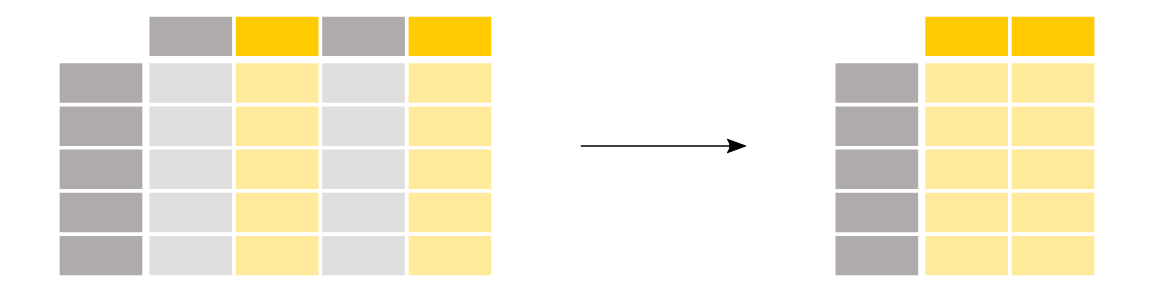

In [ ]:
ages = df_titanic["Age"]
print(type(ages))
print(ages.shape)
print(ages.head())

<class 'pandas.core.series.Series'>
(887,)
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [ ]:
# selecting two columns
age_sex = df_titanic[["Age", "Sex"]]

print(type(age_sex))
print(age_sex.shape)
print(age_sex.head())


<class 'pandas.core.frame.DataFrame'>
(887, 2)
    Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male


### specific rows from a DataFrame

In [ ]:
above_35 = df_titanic[df_titanic["Age"] > 39]
print(above_35.head())
print(above_35.shape)
print(type(above_35))

    Survived  Pclass  ... Parents/Children Aboard      Fare
6          0       1  ...                       0   51.8625
11         1       1  ...                       0   26.5500
15         1       2  ...                       0   16.0000
30         0       1  ...                       0   27.7208
31         1       1  ...                       0  146.5208

[5 rows x 8 columns]
(196, 8)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
882    False
883    False
884    False
885    False
886    False
Name: Age, Length: 887, dtype: bool

In [ ]:
#Titanic passengers from cabin class 2 and 3.
#class_23 = df_titanic[df_titanic["Pclass"].isin([ 2, 3])]
class_23 = df_titanic[(df_titanic["Pclass"] == 2) | (df_titanic["Pclass"] == 3)]
print(class_23.shape)
print(class_23.head() )

(54, 8)
     Survived  Pclass  ... Parents/Children Aboard    Fare
15          1       2  ...                       0  16.000
33          0       2  ...                       0  10.500
147         0       2  ...                       2  26.000
148         0       2  ...                       0  13.000
149         0       2  ...                       0  12.525

[5 rows x 8 columns]


In [ ]:
# display all pessenger age above 35 travelling in class 2
class_23 = df_titanic[(df_titanic["Pclass"] == 2) & (df_titanic["Age"] >35)]
# display all pessenger name age above 35 travelling in class 2
class_23 = df_titanic[(df_titanic["Pclass"] == 2) & (df_titanic["Age"] >35)]
print(class_23.shape)
print(class_23.head() )
print(class_23['Name'].head())

(54, 8)
     Survived  Pclass  ... Parents/Children Aboard    Fare
15          1       2  ...                       0  16.000
33          0       2  ...                       0  10.500
147         0       2  ...                       2  26.000
148         0       2  ...                       0  13.000
149         0       2  ...                       0  12.525

[5 rows x 8 columns]
15       Mrs. (Mary D Kingcome) Hewlett
33                 Mr. Edward H Wheadon
147                 Mr. Michel Navratil
148    Rev. Thomas Roussel Davids Byles
149           Rev. Robert James Bateman
Name: Name, dtype: object


In [ ]:
#passenger data for which the age is known.
age_no_na = df_titanic[df_titanic["Age"].notna()]
print(age_no_na.head())
print(age_no_na.shape)

   Survived  Pclass  ... Parents/Children Aboard     Fare
0         0       3  ...                       0   7.2500
1         1       1  ...                       0  71.2833
2         1       3  ...                       0   7.9250
3         1       1  ...                       0  53.1000
4         0       3  ...                       0   8.0500

[5 rows x 8 columns]
(887, 8)


###  specific rows and columns from a DataFrame

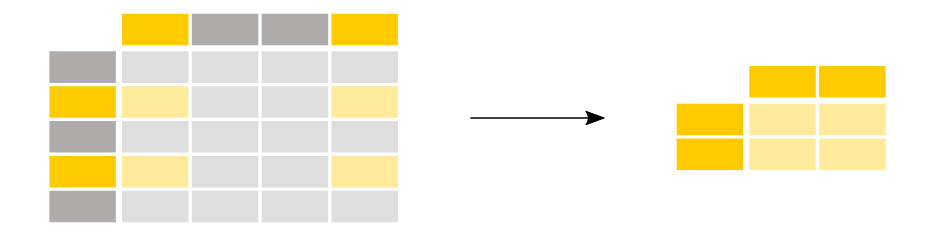

* When selecting subsets of data, square brackets [] are used. Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.

* Select specific rows and/or columns using loc when using the row and column names

* Select specific rows and/or columns using iloc when using the positions in the table

* assign new values to a selection based on loc/iloc.
  * loc: selection by label
  * iloc: selection by position

In [ ]:
#names of the passengers older than 35 years.
adult_names = df_titanic.loc[df_titanic["Age"] > 35, "Name"]
print(adult_names.shape)
print(adult_names.head())

(262,)
1     Mrs. John Bradley (Florence Briggs Thayer) Cum...
6                                Mr. Timothy J McCarthy
11                              Miss. Elizabeth Bonnell
13                           Mr. Anders Johan Andersson
15                       Mrs. (Mary D Kingcome) Hewlett
Name: Name, dtype: object


In [ ]:
#rows 10 till 25 and columns 3 to 5.
df_titanic.iloc[9:25, 2:5]

,Name,Sex,Age
9,Mrs. Nicholas (Adele Achem) Nasser,female,14.0
10,Miss. Marguerite Rut Sandstrom,female,4.0
11,Miss. Elizabeth Bonnell,female,58.0
12,Mr. William Henry Saundercock,male,20.0
13,Mr. Anders Johan Andersson,male,39.0
14,Miss. Hulda Amanda Adolfina Vestrom,female,14.0
15,Mrs. (Mary D Kingcome) Hewlett,female,55.0
16,Master. Eugene Rice,male,2.0
17,Mr. Charles Eugene Williams,male,23.0
18,Mrs. Julius (Emelia Maria Vandemoortele) Vande...,female,31.0


In [ ]:
#df_titanic.iloc[0:3, 3] = "anonymous"
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df= df_titanic.set_index('Name')
df.loc['Miss. Laina Heikkinen', 'Fare']

7.925

In [ ]:
df.loc['Miss. Laina Heikkinen':'Mr. William Henry Allen', :]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.925
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.100
Mr. William Henry Allen,0,3,male,35.0,0,0,8.050


### Advanced data munging 

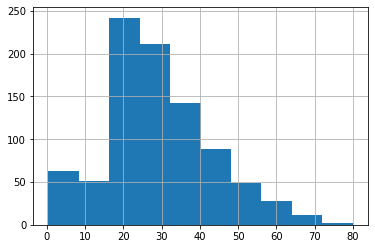

In [ ]:
# the age distribution of the passengers?
df_titanic['Age'].hist()

In [ ]:
# the survival rate of the passengers differ between sexes
df_titanic.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.190227


In [ ]:
#df_titanic.info()
# display first 20 rows for column Survived and Sex
#df_titanic.iloc[0:20, 0:4]
#df_titanic.iloc[0:20, [0,3]]
df_titanic.groupby('Sex')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


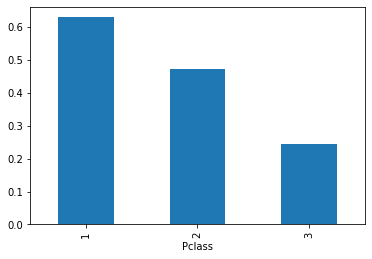

In [ ]:
#survival rate between the different classes
df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

In [ ]:

# df_titanic.plot(kind='box', ylim=[0,250])

In [ ]:
#Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers
df_titanic.loc[df_titanic['Sex'] == 'male', 'Age'].mean()

30.431361256544506

In [ ]:
#Based on the titanic data set, how many passengers older than 70 were on the Titanic?
len(df[df['Age'] > 70])

5

In [ ]:
(df['Age'] > 70).sum()

5

### Group by Operation

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [ ]:
print(df.sum() )
print ( df.mean())

key     ABCABCABC
data           90
dtype: object
data    10.0
dtype: float64


In [ ]:
#simple iteration to calculate the sum
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


The "group by" concept: we want to apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

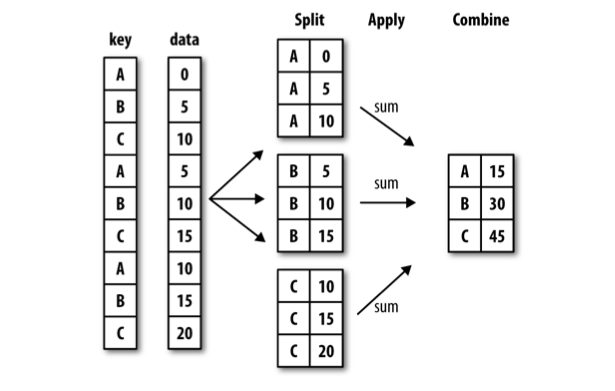




In [ ]:
#df.groupby('key').sum()

#alternate
#import numpy as np
#df.groupby('key').aggregate(np.sum)

#another way
df.groupby('key')['data'].sum()

,data
key,
A,15
B,30
C,45


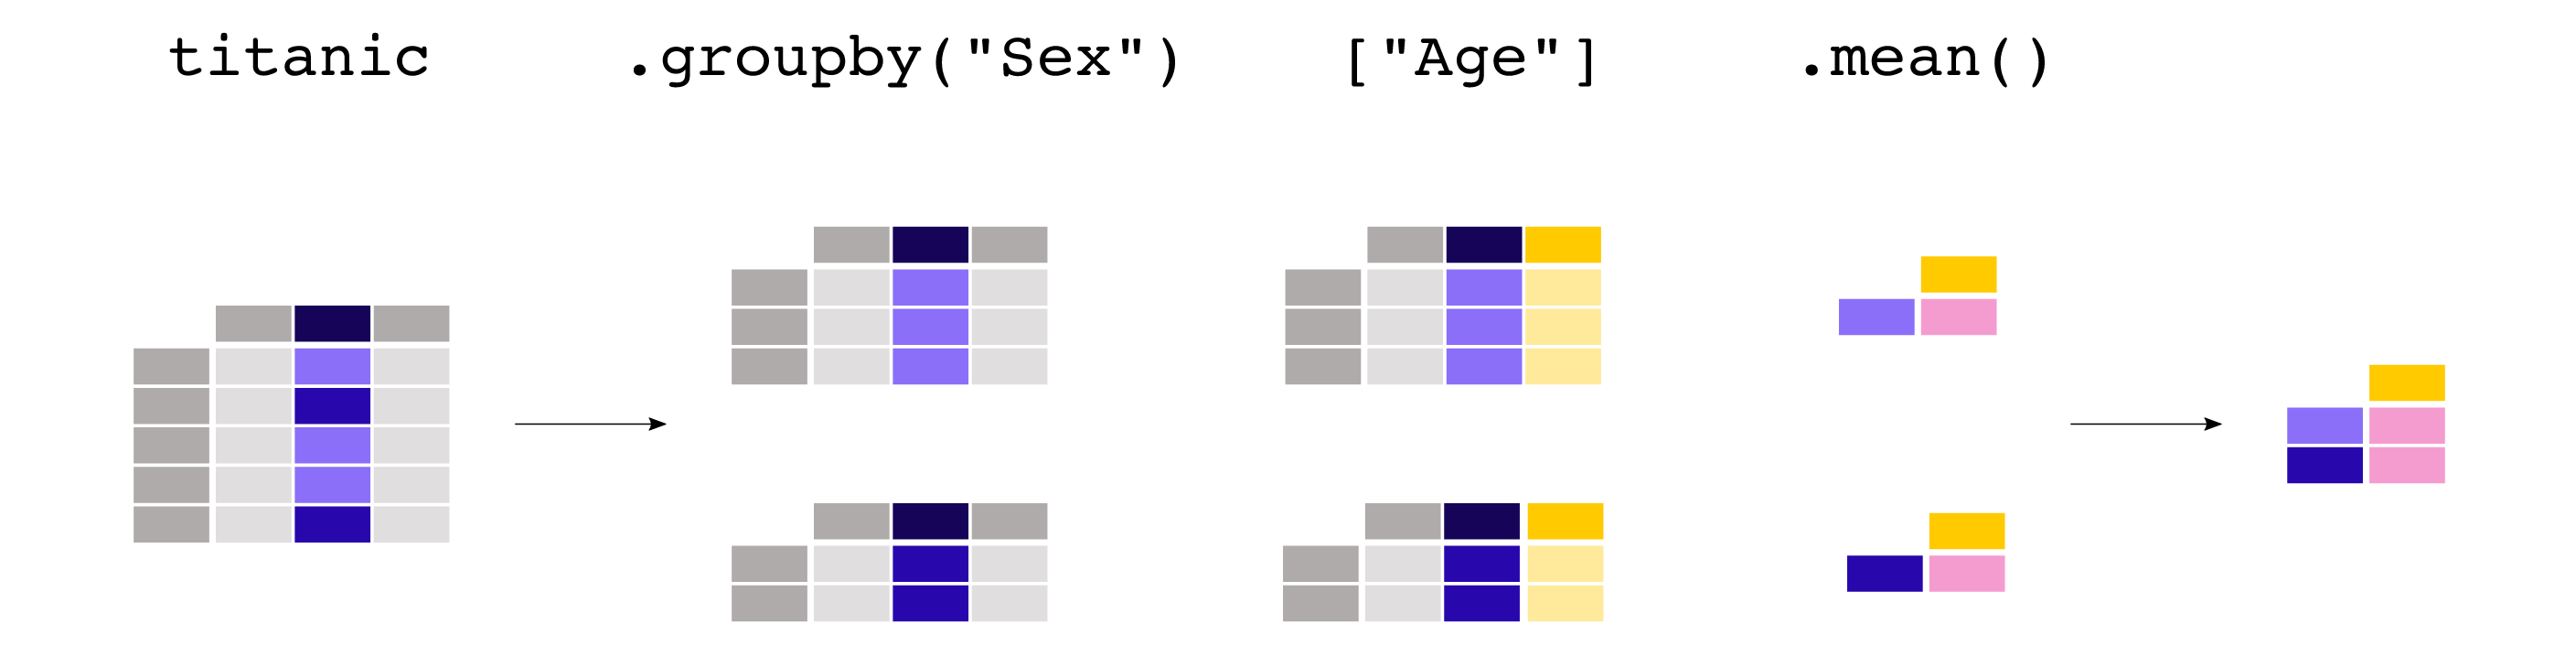

In [ ]:
df1 = df_titanic.groupby('Sex')
print (type(df1))
#print(df1.sum())
print( df1['Age'].sum())

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
Sex
female     8704.00
male      17437.17
Name: Age, dtype: float64


In [ ]:
#Calculate the average age for each sex again, but now using groupby.
df_titanic.groupby('Sex')['Age'].mean()

Sex
female    27.719745
male      30.431361
Name: Age, dtype: float64

In [ ]:
#Calculate the average survival ratio for all passengers.
df_titanic['Survived'].mean()

0.3855693348365276

In [ ]:
#calculate the survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
df25 = df_titanic[df_titanic['Age'] <= 25]
#print(df25 ['Age'])
print(df25['Survived'].sum() )
print( len(df25['Survived']))

print(df25['Survived'].sum() / len(df25['Survived']) )

146
381
0.38320209973753283


In [ ]:
#the difference in the survival ratio between the sexes
print(df_titanic.groupby('Sex')['Survived'].mean())  #or
print(df_titanic.groupby('Sex')[['Survived']].mean())
#alternate
print(df_titanic.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x)))
#alternate
#df_titanic.groupby('Sex')[['Survived']].mean()
print(df_titanic.groupby('Sex')[['Survived','Pclass']].mean())

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64
        Survived
Sex             
female  0.742038
male    0.190227
        Survived    Pclass
Sex                       
female  0.742038  2.159236
male    0.190227  2.385689


Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


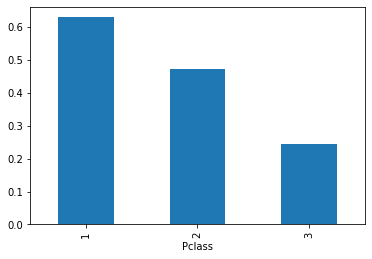

In [ ]:
# the survival accrording to the class
print(df_titanic.groupby('Pclass')['Survived'].mean())
df_titanic.groupby('Pclass')['Survived'].mean().plot(kind='bar')

        Survived
Sex             
female  0.742038
male    0.190227


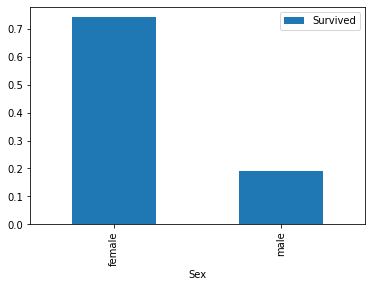

In [ ]:
print(df_titanic.groupby('Sex')[['Survived']].mean())
df_titanic.groupby('Sex')[['Survived']].mean().plot(kind = 'bar')

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
# the average Fare payed by people depending on their age
# age column is devided is separate classes using the `pd.cut`

df_titanic['AgeClass'] = pd.cut(df_titanic['Age'], bins=np.arange(0,90,10))
df_titanic [['Age','Fare', 'AgeClass']]

,Age,Fare,AgeClass
0,22.0,7.2500,"(20, 30]"
1,38.0,71.2833,"(30, 40]"
2,26.0,7.9250,"(20, 30]"
3,35.0,53.1000,"(30, 40]"
4,35.0,8.0500,"(30, 40]"
...,...,...,...
882,27.0,13.0000,"(20, 30]"
883,19.0,30.0000,"(10, 20]"
884,7.0,23.4500,"(0, 10]"
885,26.0,30.0000,"(20, 30]"


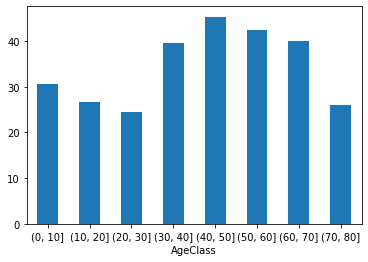

In [ ]:
df_titanic.groupby('AgeClass')['Fare'].mean().plot(kind='bar' , rot=0)

### Pivot in Pandas

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame([
    {'host': 1, 'country': 'IN', 'year': 2010, 'month': 1, 'clicks': 123, 'users': 4},
    {'host': 1, 'country': 'IN', 'year': 2010, 'month': 2, 'clicks': 134, 'users': 5},
    {'host': 1, 'country': 'IN', 'year': 2010, 'month': 3, 'clicks': 341, 'users': 2},
    {'host': 1, 'country': 'CA', 'year': 2010, 'month': 1, 'clicks': 113, 'users': 4},
    {'host': 1, 'country': 'CA', 'year': 2010, 'month': 2, 'clicks': 234, 'users': 5},
    {'host': 1, 'country': 'CA', 'year': 2010, 'month': 3, 'clicks': 421, 'users': 2},
    {'host': 1, 'country': 'CA', 'year': 2010, 'month': 4, 'clicks': 22, 'users': 3},
    {'host': 2, 'country': 'CA', 'year': 2010, 'month': 1, 'clicks': 111, 'users': 2},
    {'host': 2, 'country': 'CA', 'year': 2010, 'month': 2, 'clicks': 2, 'users': 4},
    {'host': 3, 'country': 'CA', 'year': 2010, 'month': 3, 'clicks': 34, 'users': 2},
    {'host': 3, 'country': 'CA', 'year': 2010, 'month': 4, 'clicks': 1, 'users': 1}
])

In [ ]:
print(data)

    host country  year  month  clicks  users
0      1      IN  2010      1     123      4
1      1      IN  2010      2     134      5
2      1      IN  2010      3     341      2
3      1      CA  2010      1     113      4
4      1      CA  2010      2     234      5
5      1      CA  2010      3     421      2
6      1      CA  2010      4      22      3
7      2      CA  2010      1     111      2
8      2      CA  2010      2       2      4
9      3      CA  2010      3      34      2
10     3      CA  2010      4       1      1


In [ ]:
pd.pivot_table(data,
   index=['host'], 
   values=['users', 'clicks'], 
   columns=['year', 'month'],
   fill_value='-'
  )

clicks               users         
year    2010                2010         
month      1    2    3   4     1  2  3  4
host                                     
1        118  184  381  22     4  5  2  3
2        111    2    -   -     2  4  -  -
3          -    -   34   1     -  -  2  1

In [ ]:
pd.pivot_table(data,
   index=['host'], 
   values=[ 'clicks'], 
   columns=[ 'month'],
   fill_value=''
  )

clicks              
month      1    2    3   4
host                      
1        118  184  381  22
2        111    2         
3                   34   1

In [ ]:
# adding totals
pd.pivot_table(data,
               index=['host'], 
               values=['users', 'clicks'], 
               columns=['year', 'month'],
               fill_value='',
               aggfunc=np.sum, 
               margins=True, 
               margins_name='Total'
              )

clicks                     users                
year    2010               Total  2010           Total
month      1    2    3   4           1   2  3  4      
host                                                  
1        236  368  762  22  1388     8  10  4  3    25
2        111    2            113     2   4           6
3                   34   1    35            2  1     3
Total    347  370  796  23  1536    10  14  6  4    34

In [ ]:
# pivot on more than one column. For example host and country
pd.pivot_table(data,
               index=['host', 'country'], 
               values=['users', 'clicks'], 
               columns=['year', 'month'],
               fill_value=''
              )

clicks               users         
year           2010                2010         
month             1    2    3   4     1  2  3  4
host country                                    
1    CA         113  234  421  22     4  5  2  3
     IN         123  134  341         4  5  2   
2    CA         111    2              2  4      
3    CA                    34   1           2  1

In [ ]:
# add totals 
pd.pivot_table(data,
               index=['host', 'country'], 
               values=['users', 'clicks'], 
               columns=['year', 'month'],
               aggfunc=np.sum, 
               fill_value='',
               margins=True, 
               margins_name='Total'
              )

clicks                     users                
year            2010               Total  2010           Total
month              1    2    3   4           1   2  3  4      
host  country                                                 
1     CA         113  234  421  22   790     4   5  2  3    14
      IN         123  134  341       598     4   5  2       11
2     CA         111    2            113     2   4           6
3     CA                    34   1    35            2  1     3
Total            347  370  796  23  1536    10  14  6  4    34

In [ ]:
#group by dataframe and calculate subtotals

print(data.groupby(['host', 'country'])[('clicks', 'users')].sum() ) 
#data.groupby(['host', 'country'])[('clicks', 'users')].mean()

              clicks  users
host country               
1    CA          790     14
     IN          598     11
2    CA          113      6
3    CA           35      3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#mix totals and subtotals.
out = data.groupby('host').apply(lambda sub: sub.pivot_table(
    index=['host', 'country'], 
    values=['users', 'clicks'], 
    columns=['year', 'month'],
    aggfunc=np.sum, 
    margins=True,
    margins_name='SubTotal',
))

out.loc[('', 'Max', '')] = out.max()
out.loc[('', 'Min', '')] = out.min()
out.loc[('', 'Total', '')] = out.sum()

out.index = out.index.droplevel(0)

out.fillna('', inplace=True)
out


clicks                          users                     
year               2010                 SubTotal  2010             SubTotal
month                 1     2     3   4              1   2   3   4         
host     country                                                           
1        CA         113   234   421  22    790.0     4   5   2   3     14.0
         IN         123   134   341        598.0     4   5   2         11.0
SubTotal            236   368   762  22   1388.0     8  10   4   3     25.0
2        CA         111     2              113.0     2   4              6.0
SubTotal            111     2              113.0     2   4              6.0
3        CA                      34   1     35.0             2   1      3.0
SubTotal                         34   1     35.0             2   1      3.0
Max                 236   368   762  22   1388.0     8  10   4   3     25.0
Min                 111     2    34   1     35.0     2   4   2   1      3.0
Total              1041  1110  2388  69   4495.0    30  42  18  12     96.0

In [ ]:
mydis={
    'Date':['5/1/2017','5/2/2017','5/3/2017','5/1/2017','5/2/2017','5/3/2017','5/1/2017','5/2/2017','5/3/2017'],
    'city':['new york','new york','new york','mumbai','mumbai','mumbai','beijing','beijing','beijing'],
    'temp':[65,66,68,75,78,82,80,77,79],
'humidity':[56,58,60,80,83,85,26,30,35]
}
df=pd.DataFrame(mydis)
df

,Date,city,temp,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [ ]:
df.pivot(index='Date',columns='city')

temp                 humidity                
city     beijing mumbai new york  beijing mumbai new york
Date                                                     
5/1/2017      80     75       65       26     80       56
5/2/2017      77     78       66       30     83       58
5/3/2017      79     82       68       35     85       60

In [ ]:
df.pivot(index='city',columns='Date')

temp                   humidity                  
Date     5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                          
beijing        80       77       79       26       30       35
mumbai         75       78       82       80       83       85
new york       65       66       68       56       58       60

In [ ]:

mydis={
    'Date':['5/1/2017','5/1/2017','5/2/2017','5/2/2017','5/1/2017','5/1/2017','5/2/2017','5/2/2017','5/1/2017',
            '5/1/2017','5/2/2017','5/2/2017'],
    'city':['new york','new york','new york','new york','mumbai','mumbai','mumbai','mumbai','beijing','beijing',
            'beijing','beijing'],
    'temp':[65,66,68,69,75,78,82,81,80,77,79,86],
'humidity':[56,58,60,50,80,83,85,78,26,30,35,78]
}
df=pd.DataFrame(mydis)
df

,Date,city,temp,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,66,58
2,5/2/2017,new york,68,60
3,5/2/2017,new york,69,50
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,81,78
8,5/1/2017,beijing,80,26
9,5/1/2017,beijing,77,30


In [ ]:

import numpy as np
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='count')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017        2      2        2       2      2        2
5/2/2017        2      2        2       2      2        2

In [ ]:

d=pd.pivot_table(df,index='Date',columns='city',aggfunc='sum')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       56    163      114     157    153      131
5/2/2017      113    163      110     165    163      137

In [ ]:
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='mean')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017     28.0   81.5     57.0    78.5   76.5     65.5
5/2/2017     56.5   81.5     55.0    82.5   81.5     68.5

In [ ]:

d=pd.pivot_table(df,index='Date',columns='city',aggfunc='max')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       30     83       58      80     78       66
5/2/2017       78     85       60      86     82       69

In [ ]:

#df.pivot_table(index=pd.Grouper(freq='M',key='Date'),columns='city')

### Reshaping Dataframe


In [ ]:
mydis={
    'Day':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    'Kolkata':[10,20,30,40,32,34,23],
    'Kerala':[23,32,13,42,13,43,23],
    'Mumbai':[10,20,30,40,32,34,23]
}
df=pd.DataFrame(mydis)
df

,Day,Kolkata,Kerala,Mumbai
0,Mon,10,23,10
1,Tue,20,32,20
2,Wed,30,13,30
3,Thu,40,42,40
4,Fri,32,13,32
5,Sat,34,43,34
6,Sun,23,23,23


In [ ]:
df2=pd.melt(df,id_vars=['Day'],var_name='City',value_name='Temp')
df2

,Day,City,Temp
0,Mon,Kolkata,10
1,Tue,Kolkata,20
2,Wed,Kolkata,30
3,Thu,Kolkata,40
4,Fri,Kolkata,32
5,Sat,Kolkata,34
6,Sun,Kolkata,23
7,Mon,Kerala,23
8,Tue,Kerala,32
9,Wed,Kerala,13
